In [30]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline


In [31]:
#load them from files:
df1 = pd.read_csv('C:/Users/49174/Downloads/coding_challenge.csv')

C:\Users\49174\AppData\Local\Temp\ipykernel_29652\2184146949.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('C:/Users/49174/Downloads/coding_challenge.csv')


In [32]:
# Start with your existing dataframe df1
# First, let's examine what we have
print("Dataset shape:", df1.shape)
print("\nColumn names:", df1.columns.tolist())
print("\nSample data:")
print(df1.head())


Dataset shape: (37415, 32)

Column names: ['date', 'station_number', 'wban_number', 'year', 'month', 'day', 'mean_temp', 'num_mean_temp_samples', 'mean_dew_point', 'num_mean_dew_point_samples', 'mean_sealevel_pressure', 'num_mean_sealevel_pressure_samples', 'mean_station_pressure', 'num_mean_station_pressure_samples', 'mean_visibility', 'num_mean_visibility_samples', 'mean_wind_speed', 'num_mean_wind_speed_samples', 'max_sustained_wind_speed', 'max_gust_wind_speed', 'max_temperature', 'max_temperature_explicit', 'min_temperature', 'min_temperature_explicit', 'total_precipitation', 'snow_depth', 'fog', 'rain', 'snow', 'hail', 'thunder', 'tornado']

Sample data:
         date  station_number  wban_number  year  month  day  mean_temp   
0  2000-08-11          725327        99999  2000      8   11  75.000000  \
1  2000-09-17          725316        99999  2000      9   17  62.400002   
2  2000-07-11          725316        99999  2000      7   11  76.800003   
3  2000-08-14          725305  

In [33]:
# Make a copy to avoid modifying the original
df = df1.copy()


In [34]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
date                                      0
station_number                            0
wban_number                               0
year                                      0
month                                     0
day                                       0
mean_temp                                 0
num_mean_temp_samples                     0
mean_dew_point                            9
num_mean_dew_point_samples                9
mean_sealevel_pressure                 4156
num_mean_sealevel_pressure_samples     4156
mean_station_pressure                 35530
num_mean_station_pressure_samples     35530
mean_visibility                          19
num_mean_visibility_samples              19
mean_wind_speed                          12
num_mean_wind_speed_samples              12
max_sustained_wind_speed                 17
max_gust_wind_speed                   15022
max_temperature                           3
max_temperature_explicit                  3
min_temperature

In [35]:
# Basic data exploration
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       station_number   wban_number          year         month           day   
count    37415.000000  37415.000000  37415.000000  37415.000000  37415.000000  \
mean    725316.975999  76494.458693   2004.650140      6.404544     15.693305   
std          8.979533  37759.645955      2.975256      3.477842      8.799459   
min     725300.000000   3887.000000   2000.000000      1.000000      1.000000   
25%     725314.000000  14842.000000   2002.000000      3.000000      8.000000   
50%     725316.000000  99999.000000   2005.000000      6.000000     16.000000   
75%     725326.000000  99999.000000   2007.000000      9.000000     23.000000   
max     725330.000000  99999.000000   2010.000000     12.000000     31.000000   

          mean_temp  num_mean_temp_samples  mean_dew_point   
count  37415.000000           37415.000000    37406.000000  \
mean      51.327756              23.477643       41.549799   
std       19.339455               1.931922       18.702883   
min

In [36]:
# Task 1: Convert date format to 'YYYY-MM-DD' if needed
# Create Date column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

# Filtering
df_filtered = df[
    (df['year'] >= 2000) & (df['year'] <= 2005) &
    (df['station_number'] >= 725300) & (df['station_number'] <= 726300)
]

#Check the first 5 lines
df_filtered.head()


,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2000-08-11,725327,99999,2000,8,11,75.000000,11,60.500000,11.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
1,2000-09-17,725316,99999,2000,9,17,62.400002,23,47.500000,23.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
2,2000-07-11,725316,99999,2000,7,11,76.800003,23,73.000000,23.0,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
3,2000-08-14,725305,99999,2000,8,14,74.099998,23,66.599998,23.0,...,NaN,NaN,0.01,NaN,False,False,False,False,False,False
4,2000-01-23,725317,99999,2000,1,23,25.299999,23,22.500000,23.0,...,NaN,NaN,0.00,NaN,True,True,True,True,True,True


In [37]:
# Ensure data types are correct
if 'snow_depth' in df.columns:
    df['snow_depth'] = pd.to_numeric(df['snow_depth'], errors='coerce')
if 'max_temp' in df.columns:
    df['max_temp'] = pd.to_numeric(df['max_temp'], errors='coerce')
if 'min_temp' in df.columns:
    df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')

In [38]:
# Task 2: Focus on stations 725300 to 725330 if needed
#From here you want to work with the data from all stations 725300 to 725330 that have information from 2000 till 2005.
df_subset = df_filtered[
    (df_filtered['station_number'] >= 725300) & (df_filtered['station_number'] <= 725330)
]
df_subset.head()




,date,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2000-08-11,725327,99999,2000,8,11,75.000000,11,60.500000,11.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
1,2000-09-17,725316,99999,2000,9,17,62.400002,23,47.500000,23.0,...,NaN,NaN,0.00,NaN,False,False,False,False,False,False
2,2000-07-11,725316,99999,2000,7,11,76.800003,23,73.000000,23.0,...,NaN,NaN,NaN,NaN,False,False,False,False,False,False
3,2000-08-14,725305,99999,2000,8,14,74.099998,23,66.599998,23.0,...,NaN,NaN,0.01,NaN,False,False,False,False,False,False
4,2000-01-23,725317,99999,2000,1,23,25.299999,23,22.500000,23.0,...,NaN,NaN,0.00,NaN,True,True,True,True,True,True


In [39]:
#Start by checking which year received the most snowfall in our data. 
# Filter stations from 725300 to 725330
df_snow = df_filtered[
    (df_filtered['station_number'] >= 725300) &
    (df_filtered['station_number'] <= 725330)
]

# Reset missing snow_depth data (we assume no precipitation)
df_snow['snow_depth'] = df_snow['snow_depth'].fillna(0)

# Calculate total snow depth by year
snow_by_year = df_snow.groupby('year')['snow_depth'].sum().sort_values(ascending=False)

#Print the year with the most snow
print("The year with the most snow:")
print(snow_by_year.head(1))


The year with the most snow:
year
2000    1084.500006
Name: snow_depth, dtype: float64


In [40]:
#Add an additional field that indicates the daily change in snow depth measured at every station. And identify the station and day for which the snow depth increased the most.
# First we sort the data by station number and date
df_snow = df_snow.sort_values(by=['station_number', 'date'])

# According to each station, we get the difference compared to the previous day
df_snow['snow_depth_change'] = df_snow.groupby('station_number')['snow_depth'].diff()

#Let's find the biggest increase
max_increase_row = df_snow.loc[df_snow['snow_depth_change'].idxmax()]

print("The day with the highest snow increase:")
print(max_increase_row[['station_number', 'date', 'snow_depth_change']])



The day with the highest snow increase:
station_number                    725300
date                 2005-01-22 00:00:00
snow_depth_change                    9.8
Name: 7384, dtype: object


In [44]:
#Do further checks on the remaining dataset, clean or drop data depending on how you see appropriate
# General missing value check
missing_summary = df_snow.isnull().sum()
print("Summary of missing values:")
print(missing_summary[missing_summary > 0])

# Reset missing values in snow depth and change
df_snow['snow_depth'] = df_snow['snow_depth'].fillna(0)
df_snow['snow_depth_change'] = df_snow['snow_depth_change'].fillna(0)

# If some values are missing, such as temperature, we can delete rows (optional)
df_snow = df_snow.dropna(subset=['max_temperature', 'min_temperature'])

#  Outlier data check - e.g. snow depth should not be negative
df_snow = df_snow[df_snow['snow_depth'] >= 0]

# Let's recheck the date range
print(f"Oldest date in the data: {df_snow['date'].min()}")
print(f"Latest date in the data: {df_snow['date'].max()}")


Summary of missing values:
Series([], dtype: float64)
Oldest date in the data: NaT
Latest date in the data: NaT


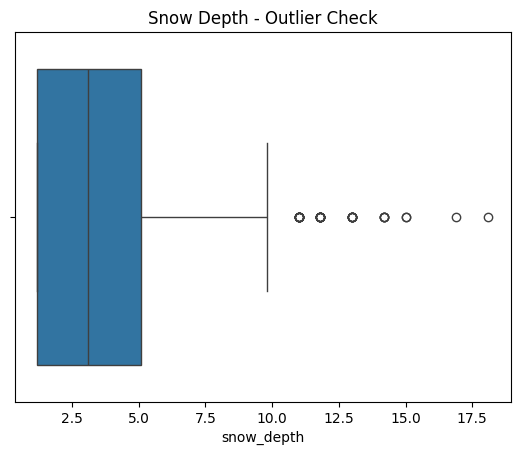

In [47]:


# Distribution for snow depth
sns.boxplot(x=df_subset['snow_depth'])
plt.title("Snow Depth - Outlier Check")
plt.show()


In [54]:

#Part 2

#If you made it up to here all by yourself, 
#you can use your prepared dataset to train an algorithm of your choice to forecast whether it will snow 
#on the following date for each station in this dataset:
# Snow depth is preparing for comparison with the previous day
df = df.sort_values(['station_number', 'date'])
df['prev_snow_depth'] = df.groupby('station_number')['snow_depth'].shift(1)
df['snow_depth_change'] = df['snow_depth'] - df['prev_snow_depth']

# The target is variable: Is there snow the next day?
df['snow_tomorrow'] = df.groupby('station_number')['snow'].shift(-1).astype(bool)

#  Sine/cosine transform for seasonality of lunar information
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Cleaning: take only what is necessary, remove what is missing
df_clean = df.dropna(subset=[
    'mean_temp', 'mean_dew_point', 'mean_visibility', 'mean_wind_speed',
    'max_sustained_wind_speed', 'snow_depth', 'total_precipitation',
    'snow_tomorrow'
])



In [81]:
# Extract additional date-related features
df['month'] = df['date'].dt.month
df['day_of_year'] = df['date'].dt.dayofyear
df['weekday'] = df['date'].dt.weekday





In [84]:
# Split the dataset into training and testing sets
train_data = df[df['date'] < dt.datetime.today() - dt.timedelta(days=20*365)]  # The past 20 years
test_data = df[df['date'] >= dt.datetime.today() - dt.timedelta(days=20*365)]  # The last 20 years

# Features (input data)
X_train = train_data[['mean_temp', 'rain', 'mean_dew_point', 'snow_depth_change', 'month', 'day_of_year', 'weekday']]
X_test = test_data[['mean_temp', 'rain', 'mean_dew_point', 'snow_depth_change', 'month', 'day_of_year', 'weekday']]

# Target (what you're predicting)
y_train = train_data['snow_tomorrow']
y_test = test_data['snow_tomorrow']



In [88]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Initialize the SimpleImputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Create a pipeline that first imputes missing values, then fits the RandomForest model
model_pipeline = make_pipeline(imputer, RandomForestClassifier(n_estimators=100, random_state=42))

# Train the model using the pipeline
model_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))





Accuracy: 86.68%
              precision    recall  f1-score   support

       False       0.90      0.95      0.93     15962
        True       0.30      0.16      0.21      1949

    accuracy                           0.87     17911
   macro avg       0.60      0.56      0.57     17911
weighted avg       0.84      0.87      0.85     17911



In [89]:
# Drop rows with missing values in X_train and X_test
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Keep only the corresponding rows in y_train
X_test = X_test.dropna()
y_test = y_test[X_test.index]  # Keep only the corresponding rows in y_test

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))




Accuracy: 72.30%
              precision    recall  f1-score   support

       False       0.89      0.76      0.82       391
        True       0.32      0.54      0.40        82

    accuracy                           0.72       473
   macro avg       0.60      0.65      0.61       473
weighted avg       0.79      0.72      0.75       473

